# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

### Imports:

In [14]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [22]:
# Your code here. 

data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

student_data = pd.DataFrame(data)

student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

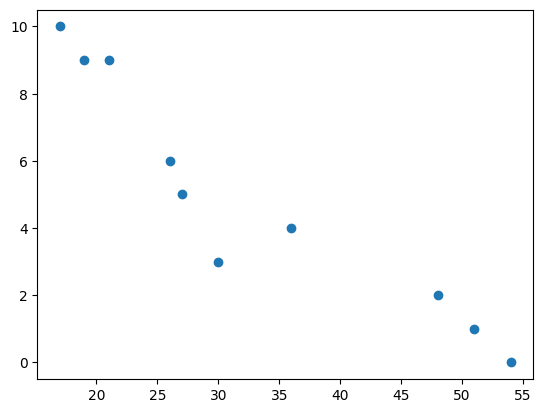

In [13]:
# Your code here.
plt.scatter(x= student_data['Age'], y=student_data['Tardies']);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In the scatter plot we can see an almost lineal distribution that (because of the way I painted), runs downwards and implies that the theory of the bootcamp's worker is correct. There is a relation between the age of the student and their tardiness.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [18]:
# Your response here.
student_data[['Age','Tardies']].cov()

# Covariance is a measure of relationship between 2 variables that is scale dependent, 
# i.e. how much will a variable change when another variable changes. 
# Interpreting covariance is hard to gain any meaning from since the values are not scale dependent 
# and does not have any upper bound. This is where correlation comes in.

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [20]:
student_data[['Age','Tardies']].corr()

# Correlation overcomes the lack of scale dependency that is present in covariance by standardizing the values. 
# This standardization converts the values to the same scale.
# The closer the correlation coeffiecient is to -1 or 1, the stronger the relationship; whereas, 
# the close the correlation coefficient is to 0, the weaker the relationship is.
# The fact that the correlation is negative means that the more age less tardines.

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
from sklearn.linear_model import LinearRegression as LinReg 
from sklearn.model_selection import train_test_split as tts 

I imported linear regression because of the linear distribution of the variables and their correlation. I would set the Age as X and the Tardies as y. 

In [56]:
X = student_data[['Age']]
y = student_data['Tardies']

In [90]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [91]:
linreg = LinReg()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

Plot your regression model on your scatter plot.

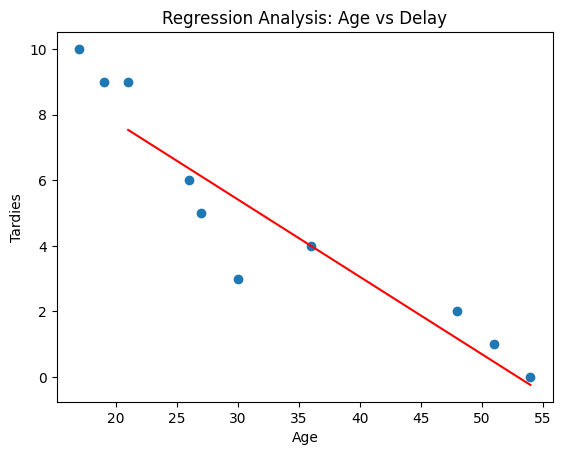

In [92]:
# Your code here.
plt.scatter(x= student_data['Age'], y=student_data['Tardies'])    # my scatter with the data form the df

plt.plot(X_test, y_pred,color='r')                                # the model painted in red

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Regression Analysis: Age vs Delay')

plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*Looking at the plot we I can clearly see the regression of the model over the actual data. As we could see before in the correlation calculations, there is an inverse relation between the amount of tardies and the age, meaning that the older they are less tardies. The model (in red) shows a line that eventhough only matched at the age of 36 or so, we can see the values of the data frame pretty much placed accordingly to the regression model. Showing a linear relation between the two values.*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [82]:
vehicles = pd.read_csv('vehicles.csv')

vehicles.sample(5)                              # a sample of the df to see some random rows.

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
5996,Chevrolet,G10/20 Van 2WD,1993,6.2,8.0,Automatic 4-spd,Rear-Wheel Drive,"Vans, Cargo Type",Diesel,22.481471,15,20,17,598.823529,2150
31222,Subaru,Impreza Wagon AWD,2014,2.5,4.0,Manual 6-spd,All-Wheel Drive,Small Station Wagons,Premium,17.347895,17,23,19,468.000000,2150
23575,Mercedes-Benz,C300 Convertible,2017,2.0,4.0,Automatic 9-spd,Rear-Wheel Drive,Subcompact Cars,Premium,12.677308,23,31,26,342.000000,1550
9722,Dodge,Dakota Cab Chassis 2WD,1989,3.9,6.0,Manual 5-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,11,16,13,683.615385,2550
13790,Ford,Ranger Pickup 2WD,1986,2.3,4.0,Manual 5-spd,Rear-Wheel Drive,Small Pickup Trucks,Regular,13.733750,23,26,24,370.291667,1400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


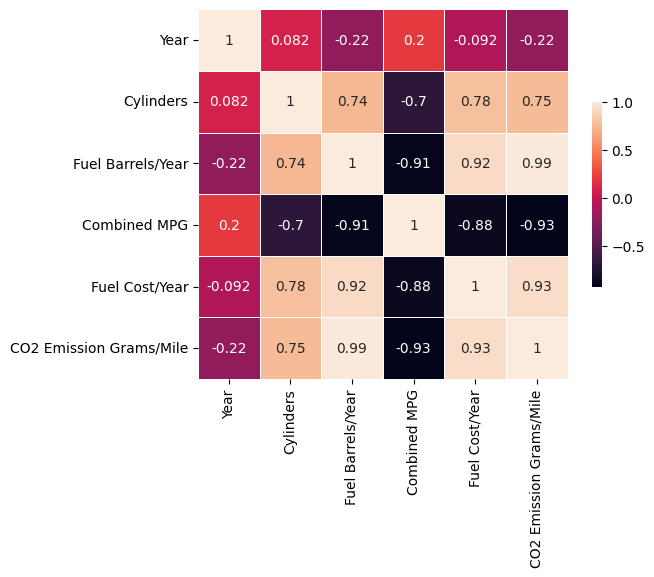

In [127]:
df = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
display(df.corr())
sns.heatmap(df.corr(),
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5});

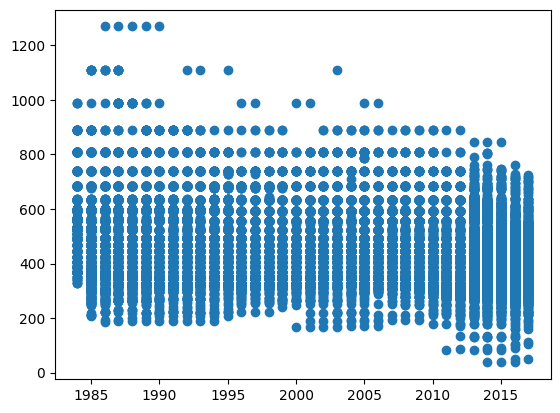

In [98]:
plt.scatter(df.Year, df['CO2 Emission Grams/Mile']);

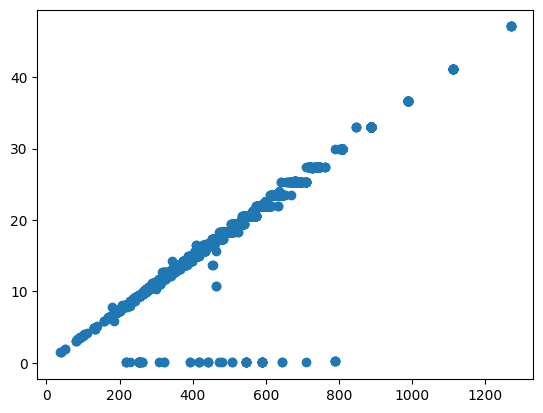

In [100]:
plt.scatter(df['CO2 Emission Grams/Mile'], df['Fuel Barrels/Year']);

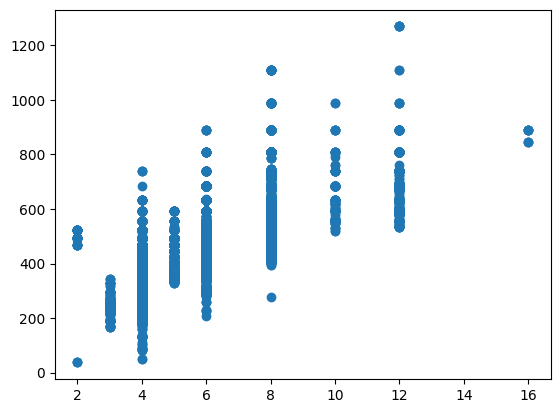

In [102]:
plt.scatter(df['Cylinders'], df['CO2 Emission Grams/Mile']);

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     35952 non-null  int64  
 1   Cylinders                35952 non-null  float64
 2   Fuel Barrels/Year        35952 non-null  float64
 3   Combined MPG             35952 non-null  int64  
 4   Fuel Cost/Year           35952 non-null  int64  
 5   CO2 Emission Grams/Mile  35952 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


In [115]:
X = df.drop('CO2 Emission Grams/Mile', axis=1)
y = df['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28761, 5), (7191, 5), (28761,), (7191,))

In [116]:
X_train

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
26605,2009,6.0,16.480500,20,2000
17525,2002,3.0,7.012979,47,700
10971,1993,8.0,29.964545,11,3050
18638,2016,4.0,12.677308,26,1550
10301,2000,4.0,12.207778,27,1250
...,...,...,...,...,...
9046,1988,8.0,23.543571,14,2400
3875,2014,8.0,23.543571,14,2900
33475,2010,6.0,18.311667,18,1850
32046,1987,4.0,13.184400,25,1350


In [117]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()

escalador.fit(X_train[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])

X_train[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']] = escalador.transform(X_train[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])

X_train

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
26605,0.819406,0.133801,-0.256915,0.019534,0.206139
17525,0.125730,-1.576791,-2.374487,5.334606,-2.352121
10971,-0.766139,1.274197,2.759021,-1.752156,2.272426
18638,1.513082,-1.006594,-1.107563,1.200661,-0.679412
10301,-0.072463,-1.006594,-1.212582,1.397516,-1.269780
...,...,...,...,...,...
9046,-1.261621,1.274197,1.322861,-1.161593,0.993296
3875,1.314889,1.274197,1.322861,-1.161593,1.977242
33475,0.918503,0.133801,0.152657,-0.374175,-0.089045
32046,-1.360718,-1.006594,-0.994143,1.003807,-1.072991


In [118]:
escalador.fit(X_test[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])

X_test[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']] = escalador.transform(X_test[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])

X_test

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
13039,-1.556241,0.134002,1.351222,-1.153667,1.031962
1008,1.226831,1.269660,-0.411772,0.182584,0.135473
21558,-0.065310,0.134002,0.175893,-0.390095,0.733132
541,-1.357451,-1.001656,-0.852521,0.755263,-0.960236
20267,-1.456846,0.134002,0.690099,-0.771881,0.434303
...,...,...,...,...,...
2933,1.127435,0.134002,-0.040615,-0.199202,0.533913
28370,-0.761078,0.134002,-0.235473,-0.008309,-0.462187
13716,-0.860473,-1.001656,-0.040615,-0.199202,0.533913
9068,-1.655637,1.269660,4.289547,-2.108132,3.621821


In [119]:
# Your response here. 

from sklearn.ensemble import RandomForestRegressor as RFR

regressor = RFR(n_estimators=2000,
                random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [120]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred, squared=False)

3.6585085672526825

In [122]:
regressor.score(X_train, y_train)

0.9995721800888576

In [123]:
regressor.score(X_test, y_test)

0.9990499801143943

In [128]:
dict(zip(X.columns, regressor.feature_importances_*100)) 

{'Year': 0.014970079606650305,
 'Cylinders': 0.005696878739889047,
 'Fuel Barrels/Year': 83.86085698355711,
 'Combined MPG': 16.06498387069071,
 'Fuel Cost/Year': 0.05349218740562578}

First of all I think the model worked pretty well, the scores in test and train are quite high and the differences between them show that there is not much overfitting which is one of the most common errors in random forest or decision tree.

The most important columns or variables in the data set (for this model) would be Fuel Barrels/Year and the Combine MPG which makes sense because we are talking about the amount of fuel burnt to the atmosphere.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 